## Лаб.03

### Применение полносвязной ИНС для решения задачи регрессии

---

#### Задание:
Познакомиться с простейшими приемами применения ИНС для решения задачи регрессии. [Описание исходного набора данных California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices) (на английском языке).
В наборе содержится информация о средней по кварталу стоимости домов в Калифорнии. Файл `CaliforniaHousingPrices.csv` содержит следующие столбцы:
* longitude – долгота квартала,
* latitude – широта квартала,
* housing_median_age – медиана возраста домов в квартале,
* total_rooms – общее количество комнат,
* total_bedrooms – общее количество спален,
* population – население квартала,
* households – количество домохозяйств в квартале – групп людей, живущих вместе в одном доме (как правило, семьи).
* median_income – медианный доход в квартале,
* median_house_value – медианная по кварталу стоимость дома – целевой (прогнозируемый) признак.

Необходимо построить и обучить полносвязную ИНС для прогнозирования медианной цены дома на основании указанных выше входных признаков.

**Порядок выполнения работы:**
1.	Импортируйте данные исходного набора. Для повышения скорости обработки данных в Colab можно подключить Google-диск, предварительно сохранив на нем необходимые файлы. Для подключения диска нужно использовать вертикальное меню слева (раздел Файлы, кнопка Подключить диск) – автоматически создается ячейка с кодом подключения, которую нужно запустить.
2.	Выведите фрагмент импортированного набора для контроля корректности передачи данных.
3.	Разделите набор данных на обучающую и тестовую выборку в соотношении 80/20. Можно использовать функцию `train_test_split()` из библиотеки  `sklearn`.
4.	Сформируйте массивы правильных ответов y_train и y_test из обучающего и тестового наборов соответственно, а также массивы x_train и x_test, содержащие входные признаки объектов.<br><u>Указание</u>. Могут быть полезны методы `DataFrame.pop()`, который возвращает указанный столбец, одновременно удаляя его из исходной таблицы <br>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pop.html <br>и `DataFrame.values()` <br>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html <br>Выведите тип (надо убедиться, что массивы) и размерность полученных объектов.
5.	Выполните масштабирование входных признаков обучающего и тестового набора. Рекомендуется метод стандартизации (лучше обрабатывает выбросы и аномалии).
6.	Создайте модель полносвязной ИНС с двумя скрытыми и выходным слоем. На первом скрытом слое 64, на втором – 32 нейрона; функция активации на всех слоях ReLU.
7.	Скомпилируйте модель, задав метрику MAE, функцию потерь MSE и оптимизатор Nadam. Выведите информацию о полученной архитектуре ИНС и количестве обучаемых параметров. Сопоставьте с объемом обучающих данных, сделайте вывод.
8.	Запустите процесс обучения сети с использованием проверочного набора (10% от обучающих данных) и выводом информации о процессе обучения. Установите 300 эпох обучения. Контролируйте значения метрики на обучающих и проверочных данных, убедитесь в отсутствии переобучения.
9.	Выполните оценку качества обученной модели на тестовых данных. Для ИНС с описанной выше архитектурой и параметрами обучения должно получиться значение около 45000 (может варьироваться в зависимости от способа разбиения исходного набора).
10.	Изменяя параметры архитектуры ИНС (в рамках RNN) и параметры обучения, постарайтесь добиться MAE<37000 на тестовых данных. Можно изменять:<br>• количество слоев ИНС;<br>• количество нейронов в скрытых слоях;<br>• функции активации;<br>• оптимизатор;<br>• размер подвыборок (батчей);<br>• количество эпох обучения.
11.	Сохраните лучшую модель.

---


1.	Импортируйте данные исходного набора. Для повышения скорости обработки данных в Colab можно подключить Google-диск, предварительно сохранив на нем необходимые файлы. Для подключения диска нужно использовать вертикальное меню слева (раздел Файлы, кнопка Подключить диск) – автоматически создается ячейка с кодом подключения, которую нужно запустить.

In [ ]:
# подключим библиотеки для анализа данных и выбора модели машинного обучения

import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
# добавим данные в датаафрейм

# use this line if on Jupyter
# data = pd.read_csv('CaliforniaHousingPrices.csv')

# use this line if on Colab
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/CaliforniaHousingPrices.csv')

---

2.	Выведите фрагмент импортированного набора для контроля корректности передачи данных.

In [ ]:
# выведем первые 5 строк таблицы

data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.30,37.92,32.0,3943.0,605.0,1524.0,614.0,6.0677,321600.0
1,-121.80,37.27,10.0,3301.0,593.0,2190.0,575.0,6.2230,260700.0
2,-118.20,33.96,44.0,2144.0,477.0,1760.0,452.0,2.3221,161600.0
3,-121.50,38.53,37.0,3642.0,684.0,1508.0,657.0,3.5231,114300.0
4,-121.58,39.15,34.0,1376.0,376.0,702.0,317.0,1.4946,55500.0


In [ ]:
# информация о наборе данных

data.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.30     37.92                32.0       3943.0           605.0   
1        -121.80     37.27                10.0       3301.0           593.0   
2        -118.20     33.96                44.0       2144.0           477.0   
3        -121.50     38.53                37.0       3642.0           684.0   
4        -121.58     39.15                34.0       1376.0           376.0   
...          ...       ...                 ...          ...             ...   
16995    -121.23     37.92                28.0        590.0           129.0   
16996    -119.79     36.85                11.0       2596.0           619.0   
16997    -117.89     33.87                32.0       1569.0           422.0   
16998    -121.33     38.62                19.0       1853.0           415.0   
16999    -121.47     38.54                36.0       2099.0           510.0   

       population  

---

3.	Разделите набор данных на обучающую и тестовую выборку в соотношении 80/20. Можно использовать функцию `train_test_split()` из библиотеки  `sklearn`.

In [ ]:
X = data.drop(columns=["median_house_value"])
y = np.array(data["median_house_value"].values)

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

---

4.	Сформируйте массивы правильных ответов y_train и y_test из обучающего и тестового наборов соответственно, а также массивы x_train и x_test, содержащие входные признаки объектов.<br><u>Указание</u>. Могут быть полезны методы `DataFrame.pop()`, который возвращает указанный столбец, одновременно удаляя его из исходной таблицы <br>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pop.html <br>и `DataFrame.values()` <br>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html <br>Выведите тип (надо убедиться, что массивы) и размерность полученных объектов.

In [ ]:
y_train = train_set['median_house_value'].copy()
x_train = train_set.drop('median_house_value', axis=1).copy()

y_test = test_set['median_house_value'].copy()
x_test = test_set.drop('median_house_value', axis=1).copy()

y_train = np.array(y_train)
y_test = np.array(y_test)

---

5.	Выполните масштабирование входных признаков обучающего и тестового набора. Рекомендуется метод стандартизации (лучше обрабатывает выбросы и аномалии).

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

---

6.	Создайте модель полносвязной ИНС с двумя скрытыми и выходным слоем. На первом скрытом слое 64, на втором – 32 нейрона; функция активации на всех слоях ReLU.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

---

7.	Скомпилируйте модель, задав метрику MAE, функцию потерь MSE и оптимизатор Nadam. Выведите информацию о полученной архитектуре ИНС и количестве обучаемых параметров. Сопоставьте с объемом обучающих данных, сделайте вывод.

In [ ]:
model.compile(optimizer='Nadam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


---

8.	Запустите процесс обучения сети с использованием проверочного набора (10% от обучающих данных) и выводом информации о процессе обучения. Установите 300 эпох обучения. Контролируйте значения метрики на обучающих и проверочных данных, убедитесь в отсутствии переобучения.

In [ ]:
history = model.fit(x_train, y_train, epochs=300, validation_split=0.1)

Epoch 1/300
383/383 [==============================] - 2s 2ms/step - loss: 56433352704.0000 - mae: 207416.7656 - val_loss: 55281864704.0000 - val_mae: 205380.5000
Epoch 2/300
383/383 [==============================] - 1s 2ms/step - loss: 55306448896.0000 - mae: 204960.0469 - val_loss: 53067517952.0000 - val_mae: 200546.4688
Epoch 3/300
383/383 [==============================] - 1s 2ms/step - loss: 51799588864.0000 - mae: 197046.8594 - val_loss: 48126038016.0000 - val_mae: 189128.6875
Epoch 4/300
383/383 [==============================] - 1s 2ms/step - loss: 45684510720.0000 - mae: 182431.6719 - val_loss: 40886607872.0000 - val_mae: 171112.0000
Epoch 5/300
383/383 [==============================] - 1s 2ms/step - loss: 37846384640.0000 - mae: 162292.4531 - val_loss: 32697995264.0000 - val_mae: 148803.6406
Epoch 6/300
383/383 [==============================] - 1s 2ms/step - loss: 29725702144.0000 - mae: 139137.2031 - val_loss: 24966727680.0000 - val_mae: 125328.1172
Epoch 7/300
383/383 [=

---

9.	Выполните оценку качества обученной модели на тестовых данных. Для ИНС с описанной выше архитектурой и параметрами обучения должно получиться значение около 45000 (может варьироваться в зависимости от способа разбиения исходного набора).

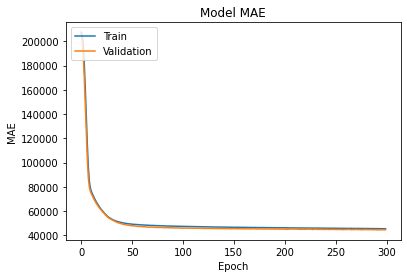

107/107 [==============================] - 0s 1ms/step - loss: 4045305856.0000 - mae: 45137.2383


[4045305856.0, 45137.23828125]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

model.evaluate(x_test, y_test)

In [ ]:
model.predict(x_test)[-5:]

array([[113420.89],
       [260540.3 ],
       [299244.88],
       [148666.78],
       [323745.  ]], dtype=float32)

In [ ]:
y_test[-5:]

array([127100., 185100., 223100.,  97300., 350000.])

---

10.	Изменяя параметры архитектуры ИНС (в рамках RNN) и параметры обучения, постарайтесь добиться $MAE<37000$ на тестовых данных. Можно изменять:<br>• количество слоев ИНС;<br>• количество нейронов в скрытых слоях;<br>• функции активации;<br>• оптимизатор;<br>• размер подвыборок (батчей);<br>• количество эпох обучения.

In [ ]:
model = Sequential()
model.add(Dense(80, activation='relu', input_shape=(8,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                720       
                                                                 
 dense_4 (Dense)             (None, 200)               16200     
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 37,121
Trainable params: 37,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=350, validation_split=0.1)

Epoch 1/350
383/383 [==============================] - 1s 3ms/step - loss: 37629521920.0000 - mae: 156507.2656 - val_loss: 12350181376.0000 - val_mae: 80712.6328
Epoch 2/350
383/383 [==============================] - 1s 2ms/step - loss: 9494153216.0000 - mae: 70328.1172 - val_loss: 7466958336.0000 - val_mae: 62425.4688
Epoch 3/350
383/383 [==============================] - 1s 2ms/step - loss: 6805853184.0000 - mae: 59447.4297 - val_loss: 5831752704.0000 - val_mae: 56553.9297
Epoch 4/350
383/383 [==============================] - 1s 2ms/step - loss: 5640472576.0000 - mae: 54353.5742 - val_loss: 4946806272.0000 - val_mae: 52422.5117
Epoch 5/350
383/383 [==============================] - 1s 2ms/step - loss: 5040174592.0000 - mae: 51523.5664 - val_loss: 4566258176.0000 - val_mae: 50464.7070
Epoch 6/350
383/383 [==============================] - 1s 2ms/step - loss: 4739322880.0000 - mae: 49884.9102 - val_loss: 4357029888.0000 - val_mae: 48544.8906
Epoch 7/350
383/383 [======================

---

11.	Сохраните лучшую модель.

In [ ]:
model.save('model_lab_3')

In [ ]:
from google.colab import files
files.download('model_lab_3')